# Кластерный анализ

Одной из задач сегментации потребителей может быть классификация потребителей по потребностям. Такая сегментация в дальнейшем может помочь выявить, какие марки популярны среди представителей разных сегментов, а также, каким образом можно было бы модифицировать продукцию компании для удовлетворения потребностей привлекательного сегмента. С точки зрения маркетологов, сегменты должны быть интерпретируемыми, измеримыми и достаточно большими. Как правило, сегментация является частью крупного исследования. 

Набор данных содержит оценки степени согласия респондентов с высказываниями, отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 11 высказываниям:
1. V1: Я потребляю леденцы, чтобы освежить дыхание
2. V2: Я потребляю леденцы, чтобы чувствовать себя увереннее
3. V3: Я потребляю леденцы, чтобы освежить полость рта
4. V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту
5. V5: Я потребляю леденцы как заменитель других кондитерских изделий
6. V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого
7. V7: Леденцы помогают мне сконцентрироваться
8. V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать
9. V9: Я потребляю леденцы для того, чтобы облегчить боль в горле
10. V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа
11. V11: Я потребляю леденцы для улучшения самочувствия

##### Вопросы:
1. Определить число кластеров.
2. Подобрать метод классификации, дающий наиболее ясные результаты.
3. Какие леденцы пользуются популярностью у потребителей из каждого сегмента?


### 1. Иерархическая кластеризация

In [221]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
df = pd.read_table('леденцы.dat', sep=";", header = 0, index_col=False)

In [222]:
df1 = df.copy()
df2 = df.copy()

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


In [224]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


### 1.1. Дендрограмма

Применим алгоритм иерархической кластеризации и построим дендрограмму. Все необходимые вычисления проводятся в функции linkage. Кроме самих данных ей нужно передать на вход два аргумента: метод вычисления расстояний между кластерами (```ward```, ```single```, ```complete```, ```average```) и метрику (```euclidean``` (default), ```cityblock``` aka Manhattan, ```hamming```, ```cosine```).

In [225]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')


Алгоритм подкрасил в дендрограмме 3 кластера, но здесь скорее кластера всё-таки 4. Теперь хочется посмотреть, какими характеристиками различаются наши кластеры.

Сначала добавим к данным колонку ```cluster```, в которую запишем номер кластера, в которую попал объект. Это сделаем с помощью функции ```fcluster```. В качестве первого аргумента передаём объект ```linkage```, полученный выше. Третьим аргументом ```criterion``` передаём критерий для разбиения на кластеры (```distance``` для остановки разбиения по расстоянию между кластерами и ```maxclust``` для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента ```criterion```.

In [226]:
# Останавливаем объединение, если расстояние между кластерами превышает 4
df1['cluster'] = fcluster(link, 4, criterion='maxclust')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [227]:
df1_ = df1.groupby('cluster').mean()
df1_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Также интересно узнать, сколько наблюдений попало в каждый кластер. Для этого также применяем вызов ```groupy``` с последующим применением метода ```size```.

In [228]:
df1.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

### 1.2. Каменистая осыпь

А можно было выбрать число кластеров не на глаз по дендрограмме, а автоматически, тем более если данных много? Можно. Построим график, носящий название "каменистая осыпь". Напомним, в матрице ```link``` во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [229]:
dist = link[:, 2]
dist

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Таким образом, можно построить график зависимости расстояний между кластерами от шага слияния (обратного), и посмотреть, начиная с какого момента это расстояние перестанет значительно меняться.

Text(10, 14.6, '4 clusters')

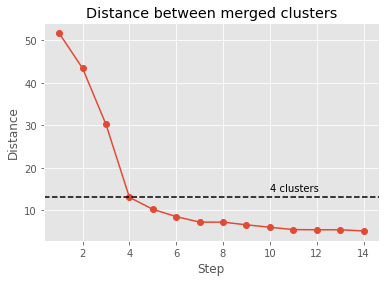

In [230]:
dist_rev = dist[::-1]
idxs = range(1, 15)
dist_rev = dist_rev[:14]

plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(13, c='k', linestyle='dashed')
plt.text(10, 14.6, '4 clusters')

### 2. Метод k-means

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2.

In [231]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=2, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [232]:
# подгонка модели по данным из df
model.fit(df2)

KMeans(n_clusters=2, random_state=42)

In [233]:
# Результат кластеризации на данных df
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [234]:
# координаты центров кластеров
model.cluster_centers_

array([[3.8826087 , 3.85217391, 3.86956522, 3.7826087 , 3.48695652,
        3.49565217, 3.49130435, 3.46521739, 2.96956522, 2.95652174,
        2.95652174],
       [2.82407407, 2.83333333, 2.76851852, 2.62037037, 2.61111111,
        2.58333333, 2.75      , 2.91666667, 4.9537037 , 4.81481481,
        4.86111111]])

In [235]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

array([0, 1])

Модель выше разбивала на два кластера. 
Как определить число кластеров?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

C:\Users\Dsizo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


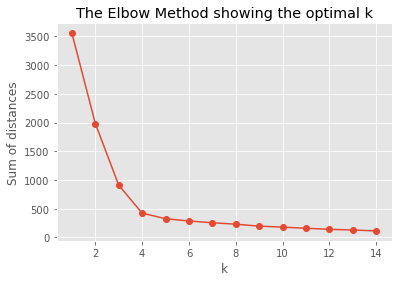

In [236]:
K = range(1, 15)
models = [KMeans(n_clusters=k, random_state=42).fit(df1) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что 4 кластера - это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [237]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df2)
df2['cluster'] = model.labels_
df2_ = df2.groupby('cluster').mean()
df2_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [238]:
# среднее значение факторов по методу k-means
df2_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [239]:
# среднее значение факторов по методу иерархической кластеризации
df1_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


### 3. Определение высказываний в каждом класторе

In [240]:
# Проходим по каждой строке DataFrame
for index, row in df2_.iterrows():
    # Найдим максимальное значение в строке
    max_value = row.max()
    
    # Находим значения, близкие к максимальному
    close_values = row[(row >= max_value - 0.5)]

    if not close_values.empty:
        # Выводим название строки и названия столбцов на одной строке
        columns = ", ".join(close_values.index)
        print(f"Кластер: {index}, Высказывания: {columns}")

Кластер: 0, Высказывания: V1, V2, V3, V4
Кластер: 1, Высказывания: V9, V10, V11
Кластер: 2, Высказывания: V7, V8
Кластер: 3, Высказывания: V5, V6


### Вывод:
1. Всего 4 сегмента.
2. Два метода дали ясные результаты.
3. В 1-м сегменте пользуются леденцами для свежести дыхания, уверенности, свежести полости рта, от неприятного вкуса во рту. 
Во 2-м сегменте пользуются леденцами для помощи концентрации и отвлечения на подумать. 
В 3-м сегменте пользуются леденцами для облегчения боли в горле, от заложеннсотиноса, улучшения самочувствия. 
В 4-м пользуются леденцами для замены других кондитерских изделий, для утоления желания сладкого.